In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

import sys
sys.path.append('../Final_notebook/')
import proj_utils as utils

Using TensorFlow backend.


https://github.com/tianzheng4/Distributionally-Adversarial-Attack

https://arxiv.org/pdf/1706.06083.pdf

https://stackoverflow.com/questions/21445005/drawing-rectangle-with-border-only-in-matplotlib?noredirect=1&lq=1

In [2]:
n_samples = 30
np.random.seed(42)

x = [np.random.uniform(size=(2))]
dist = 0.11
while(len(x) < n_samples):
    p = np.random.uniform(size=(2))
    if min(np.abs(p - a).sum() for a in x) > 2*dist:
        x.append(p)

eps = dist / 2

x = np.array(x)

In [3]:
np.random.seed(2)
y = np.ones(n_samples, dtype='int')
y[:10] = 0
np.random.shuffle(y)

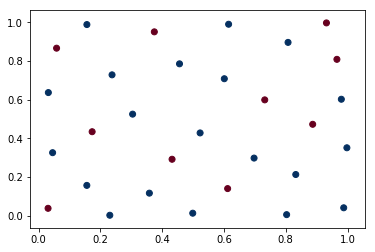

In [4]:
plt.scatter(*x.T, c=y, cmap='RdBu')
plt.set_title("Random points")
(l, r), (d, u) = plt.xlim(), plt.ylim()
bounds = (l, r, d, u)

In [5]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x, y, epochs=3000, verbose=0)
model.evaluate(x, y, verbose=0)

[0.003396317595615983, 1.0]

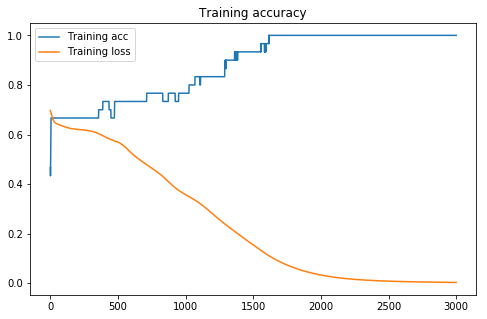

In [8]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

fig, axs = plt.subplots(figsize=(8, 5))
axs.plot(epochs, acc, label='Training acc')
axs.plot(epochs, loss, label='Training loss')
axs.set_title('Training accuracy')
axs.legend()

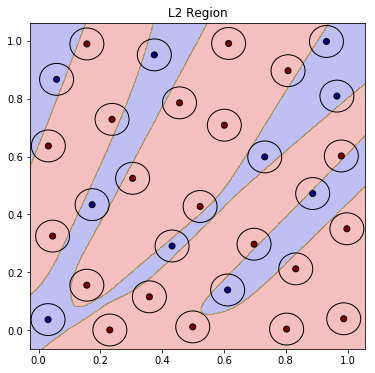

In [9]:
fig, ax = utils.plot_decision_boundary(x, y, model, bounds, cmap='jet', figsize=(6, 6))
ax.set_title("L2 Region")
for x_i in x:
    ax.add_patch(Circle(x_i, radius=eps, fill=None))

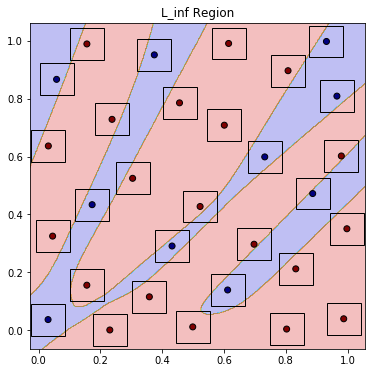

In [10]:
fig, ax = utils.plot_decision_boundary(x, y, model, bounds, cmap='jet', figsize=(6, 6))
ax.set_title("L_inf Region")
for x_i in x:
    ax.add_artist(Rectangle(x_i - eps, width=dist, height=dist, fill=None))